Boris Borisov

i6211839

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 11/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set

## 0: Introduction to the Problem

We would like to help a business man in the city of Rome (let's call this guy Pim). Pim wants to introduce a scooter rental system for people to drive around the city. He got some data from a pilot that was conducted in the city and now he would like to know more about the users and be able to draw insights from this data. 

In this clinic, you will perform tasks to clean, visualize, and explore the user data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 1
Question 2d | 1
Question 2e | 2
Question 2f | 2
Question 3a | 5
Question 3b | 3
Question 4  | 3
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 3
Question 6d | 2
Total | 40 

Your final score out of 40 will be scaled down to 1 and be your final grade for this clinic.

In [1]:
# First things first
# %pip install seaborn
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### 0.3 Loading the data

The data we are exploring is collected at a period between 2011-2012 in Rome.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total users including casual and registered  

The following code loads the data into a Pandas `DataFrame'.

In [2]:
# Run this cell to load the data.  No further action is needed
full = pd.read_csv('data/clientnumbers.txt')
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [3]:
full.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `clientnumbers.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the file.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [4]:
#your code for 1a goes here
full['holiday']=full['holiday'].replace({0:'no', 1:"yes"})
full['weekday']=full['weekday'].replace({0:'Sun', 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})
full['workingday']=full['workingday'].replace({0:'no', 1:"yes"})
full['weathersit']=full['weathersit'].replace({1:'Clear', 2:"Mist", 3:"Light", 4:"Heavy"})
full

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [5]:
num_holidays = full["holiday"].value_counts()["yes"]
num_holidays


500

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual users for each day
* `registered`: total number of registered users for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [6]:
###code for 1c goes here
daily_counts=full.groupby('dteday').agg({'casual':'sum','registered':'sum',"workingday":"first"})
daily_counts


,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


---
## 2: Exploring the Distribution of Users

Let's begin by comparing the distribution of the daily counts of casual and registered users.  

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered users we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

Text(44.40677777777777, 0.5, 'Day count')

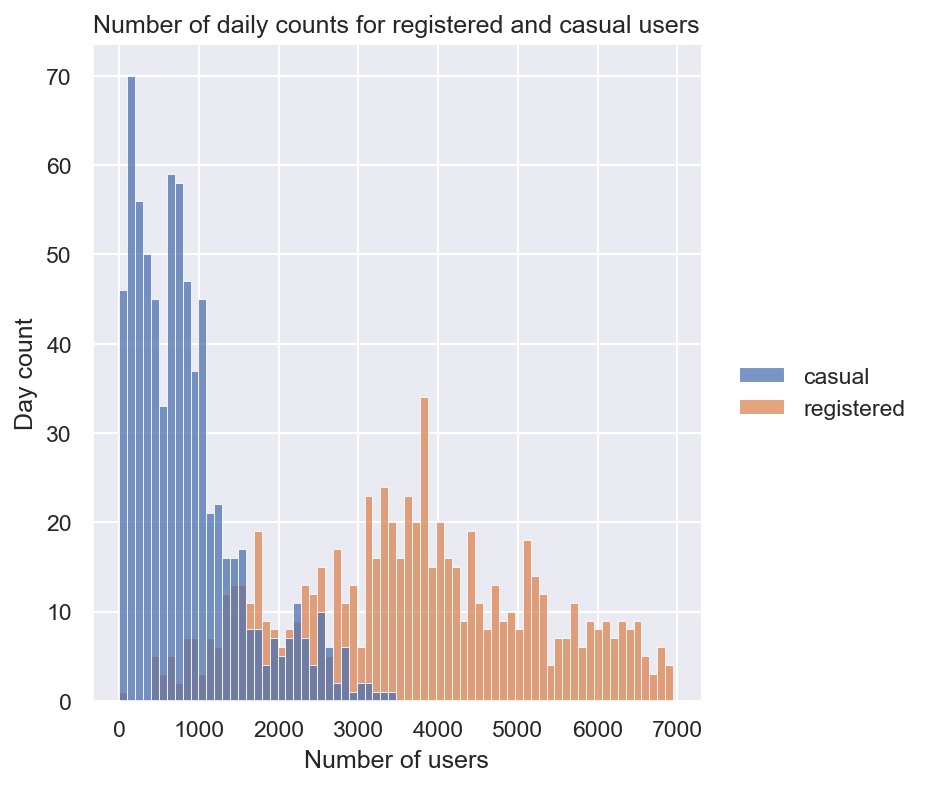

In [7]:
#code for 2a goes here

sns.displot(daily_counts,multiple="dodge",bins=70)
plt.title('Number of daily counts for registered and casual users', fontsize=12)
plt.xlabel('Number of users', fontsize=12)
plt.ylabel('Day count', fontsize=12)

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered users.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

In [8]:
# here I used the function describe in order to describe the given columns
# you can inspect the result below
describe_casual = daily_counts['casual'].describe()
describe_registered = daily_counts['registered'].describe()
describe_casual , describe_registered

(count     731.000000
 mean      848.176471
 std       686.622488
 min         2.000000
 25%       315.500000
 50%       713.000000
 75%      1096.000000
 max      3410.000000
 Name: casual, dtype: float64,
 count     731.000000
 mean     3656.172367
 std      1560.256377
 min        20.000000
 25%      2497.000000
 50%      3662.000000
 75%      4776.500000
 max      6946.000000
 Name: registered, dtype: float64)

*** fancy answer goes here ***\
The casual users' distribution is right-skewed and it is not symmetric. The mode is around 200 number of users. The mode is the most frequent element in the distribution.\
Also this distribution has a light tail at around 3000 users. The mean is around 848 number of users. The skewness in this distribution must be positive because the distribution is right-skewed. It has small gaps at around 500 and another small gap at 1000. \
There are 2 outliers in the end of the distribution at around 3200 and 3300. This distribution seems like it is an exponential distribution but for that conclusion I will need to do more further observation.


The registered users' distribution look like a normal distribution and it is is symmetric. The mode is around 3800 number of users.\
 Any symmetric data has a skewness of near zero.  There are small gaps around 800, 1200, 2100, 3100,3500, 4300, 5300. A small gap can refer to missing areas in a data set. \
It has one outlier around 0 to 100 number of users that is observed. 

### Question 2c

In addition to the type of user (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

*** fancy answer goes here ***\
Identity such as gender might be useful. We can analyze what is the distribution between the male vs female registered/ casual users. \
Also, we can use the neighbourhoods of the users that they live in.\
That way we can compare users from the same neighbourhood: what is their distribution, mean, mode, standard deviation etc.



### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

*** fancy answer goes here ***\
The gender will be a privacy issue because there are people who do not want to share their gender.\
Also, neighbourhood, gender and monetary expenses are private personal data. You need to ask explicitly the user whether he/she gives permission to his/her personal data.





### Question 2e

The density plots do not show us how the counts for registered and casual users vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `full` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

Text(0.5, 1.0, 'Scatter plot showing the relationship between casual and registered counts')

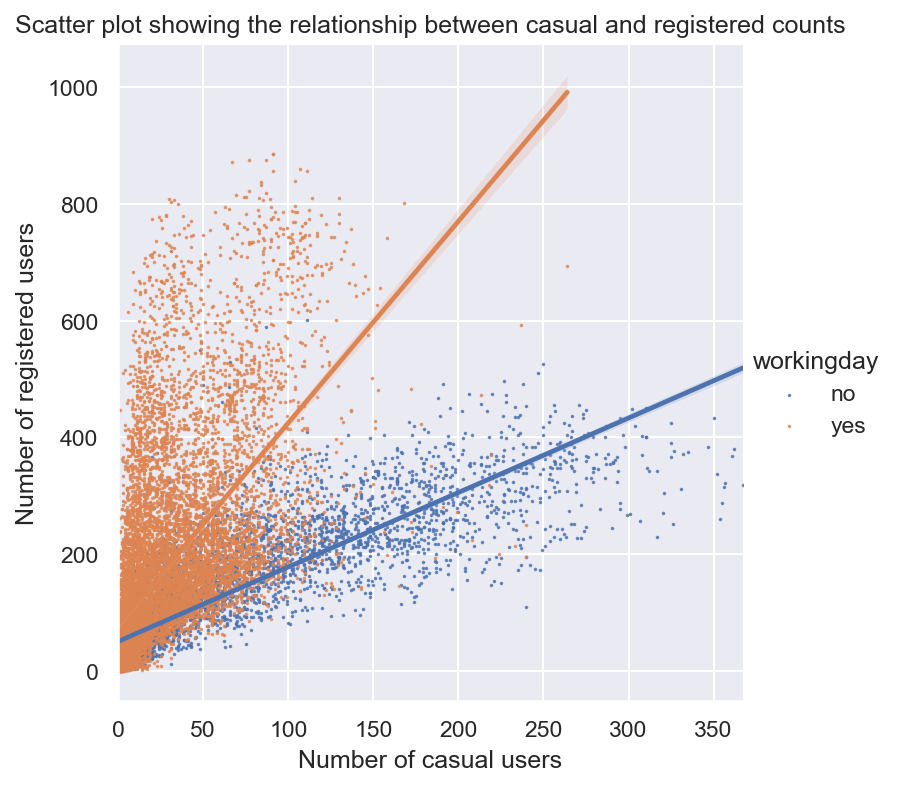

In [9]:
#code to 2e goes here

sns.lmplot(x="casual", y="registered",hue = "workingday", data =full,fit_reg=True,scatter_kws={"s":0.5})

plt.xlabel('Number of casual users')
plt.ylabel('Number of registered users')
plt.title('Scatter plot showing the relationship between casual and registered counts')

# Depending on the setup, you might want to make the font size a bit bigger


### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered users and whether or not the day is on the weekend? What effect does [overplotting](https://www.displayr.com/what-is-overplotting/) have on your ability to describe this relationship?

*** fancy answer goes here ***\
Both regression lines shows positive correlation between the casual users and registered users.\
On `working days` the number of registered users increase in the range 0 to 800, while the casual users' distribution "stay" in the range 0 to 150.\
On `weekends` the number of casual users increase in the range 0 to 360, while the registered "stay" in the range 0 to 450.\
Both variables move in "tandem" - if the first variable increases, the second variable will increase as well.\
Also, the other way around, if the first variable decreases, the second variable will decrease as well. \
\
There is overplotting on the scatterplot.\
I tried to reduce the overplotting with making the dots as small as possible.\
I cannot decide how many points are in the left bottom part of the plot. There could be a million spots in that place.


---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, we will try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want. Check the code below for how to generate a simple KDE plot. Adjust any variable names, if you have to.

C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


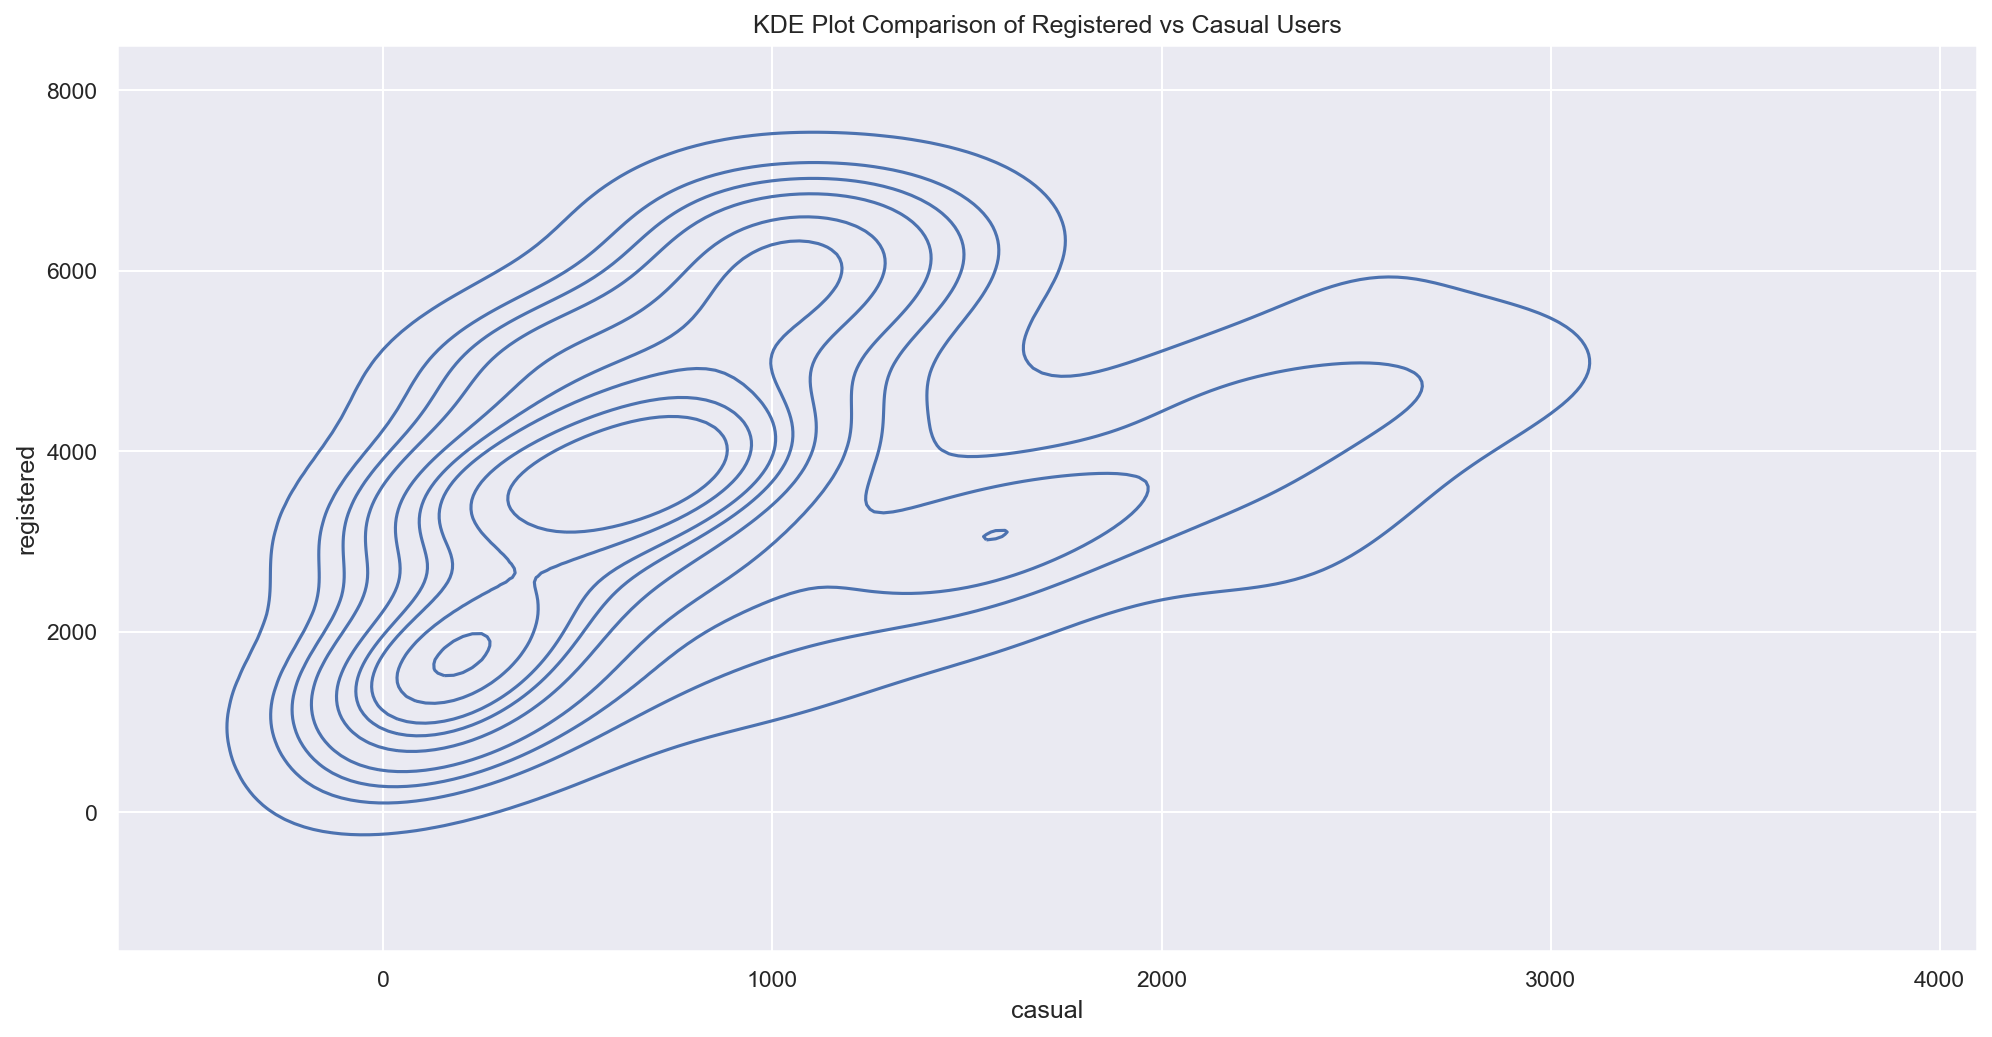

In [10]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Users');


Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints:** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice.
* Check out this [tutorial](https://financeandpython.com/courses/seaborn-data-visualization/lessons/kde-plot-part-2/) to see an example of how to set colors for each dataset and how to create a legend. The legend part uses some weird matplotlib syntax that we haven't learned! You'll probably find creating the legend annoying, but it's a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like).

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version.

C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2400x1200 with 0 Axes>

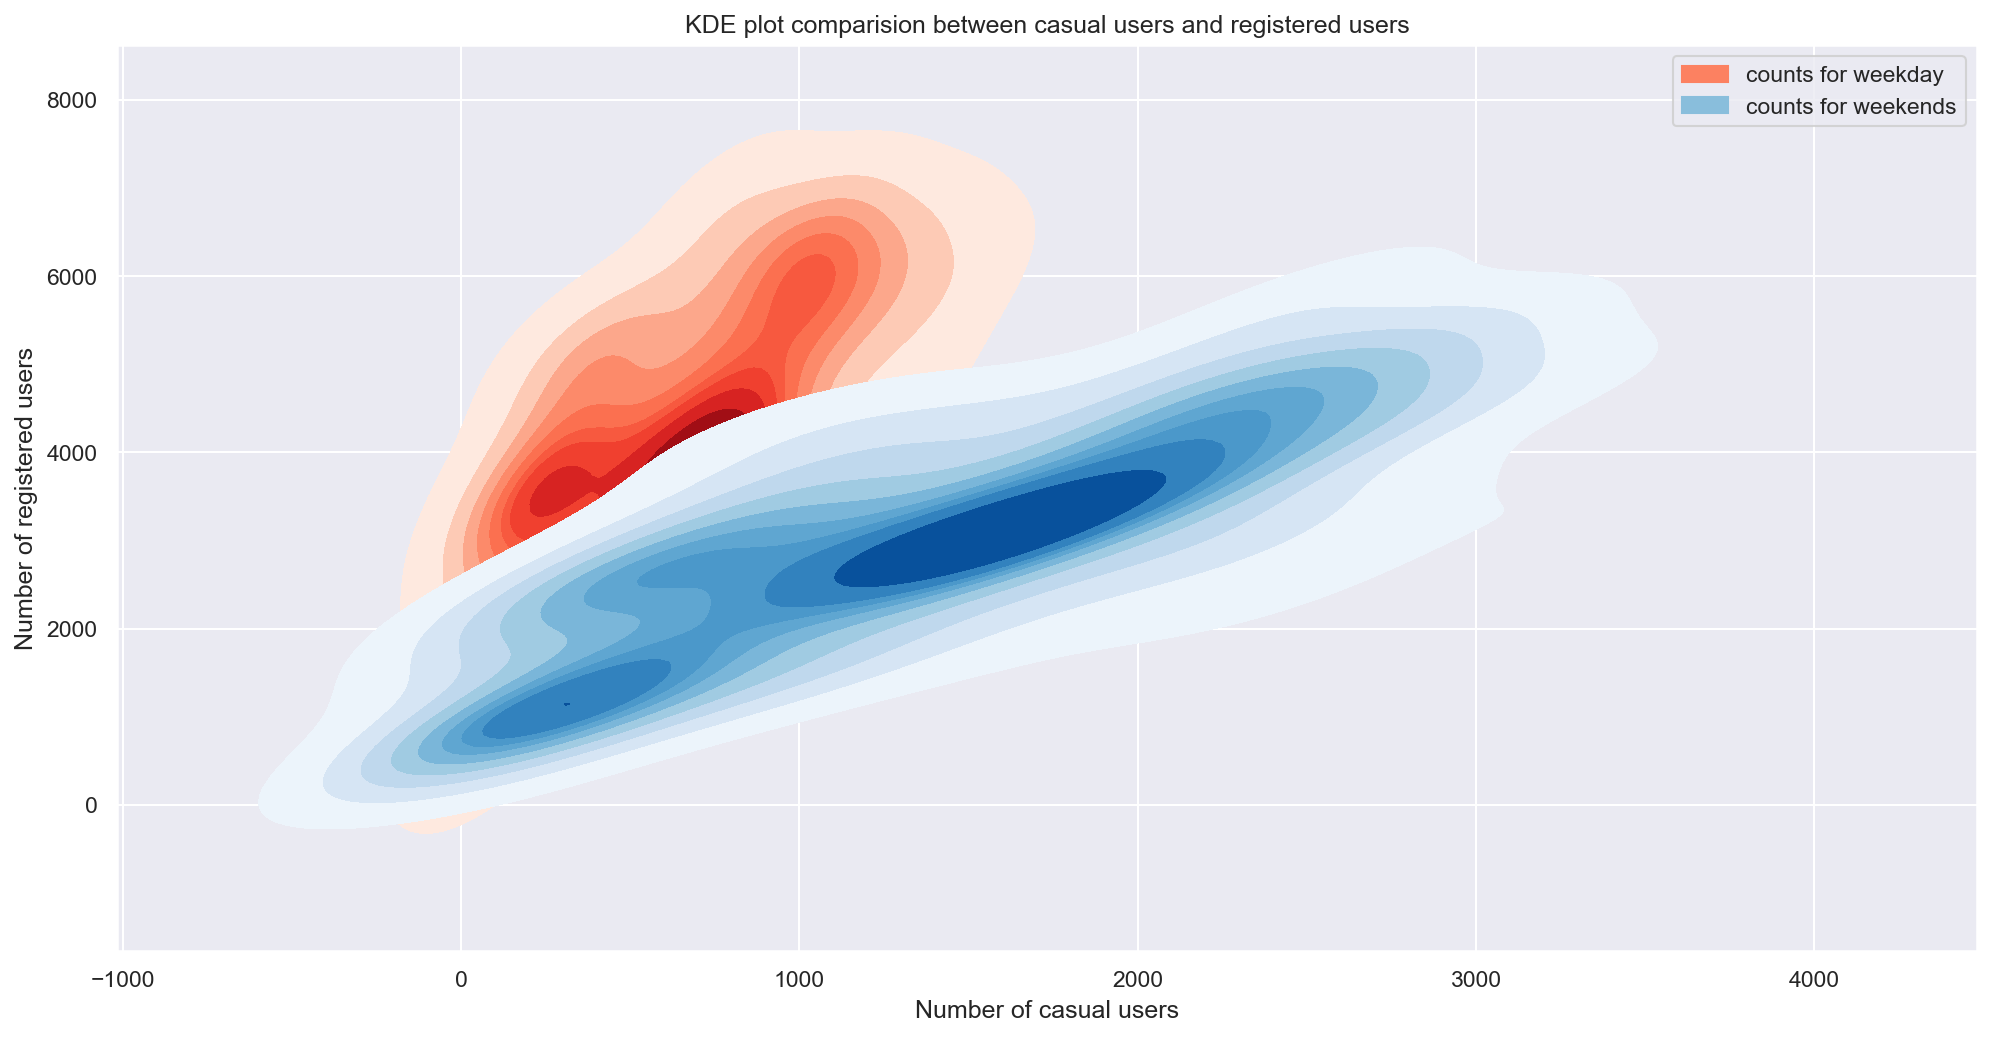

<Figure size 2400x1200 with 0 Axes>

In [11]:
# #code to 3a goes here
import matplotlib.patches as mpatches
week_list = ['Mon', 'Tue', 'Wed', 'Thu','Fri']
weekend_list = ['Sat', 'Sun']

week_df = full.groupby(['dteday']).agg({'casual':"sum",'registered':'sum', 'weekday':'first'})
daily_counts.loc[(week_df['weekday'].isin(week_list)),'weekday'] = 'yes'
daily_counts.loc[(week_df['weekday'].isin(weekend_list)),'weekday'] = 'no'

counts_for_week_days = daily_counts[daily_counts['weekday']=='yes']
r_Plot= sns.kdeplot(counts_for_week_days['casual'], counts_for_week_days['registered'],shade=True,cmap="Reds")

counts_for_weekend_days = daily_counts[daily_counts['weekday']=='no']
b_Plot=sns.kdeplot(counts_for_weekend_days['casual'], counts_for_weekend_days['registered'],shade=True,cmap="Blues")

r = sns.color_palette("Reds")[2]
b = sns.color_palette("Blues")[2]

red_patch = mpatches.Patch(color=r, label = "counts for weekday")
blue_patch = mpatches.Patch(color=b, label = "counts for weekends")

plt.legend(handles = [red_patch,blue_patch])
plt.xlabel('Number of casual users')
plt.ylabel('Number of registered users')
plt.title('KDE plot comparision between casual users and registered users')
plt.figure()


#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

*** fancy answer goes here ***\
I observe that the darker an area is, the higher the count for people is. The counts for weekdays are the highest at around 4000 registered users and around 800 casual users.\
In terms of counts for weekends, I observe that the counts for weekends are the highest when the number of casual users are around 1800 and the number of registered users are around 2100.\
In general in a contour plot, I want to see how the count for weekdays and the count for weekends variables change as a function of the x-axis: number of casual users and\
the y-axis: number of registered users.

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual users plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

Text(702.0238095238095, 0.5, 'Number of registered users')

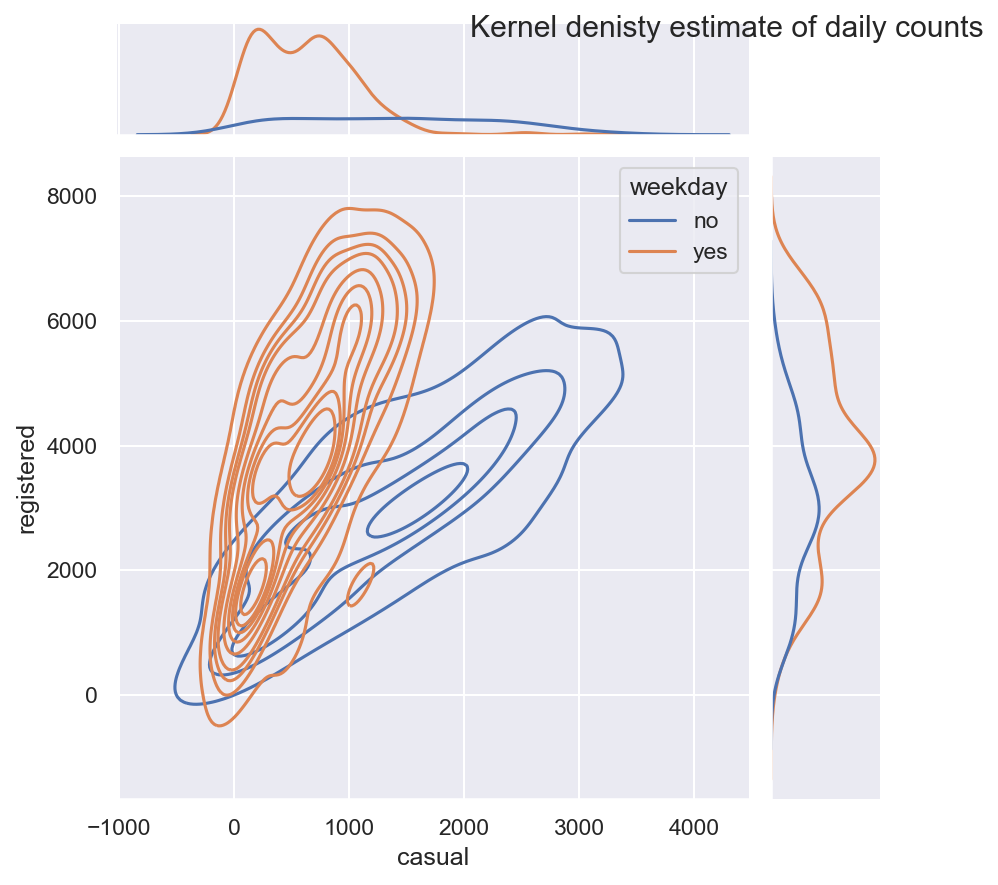

In [12]:
#code for 4 goes here
sns.jointplot(data=daily_counts, x="casual", y="registered", kind= "kde",hue = 'weekday')
plt.suptitle("Kernel denisty estimate of daily counts",x=0.8)
plt.xlabel('Number of casual users')
plt.ylabel('Number of registered users')


---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of users by plotting the average number of users for each hour of the day over the **entire dataset**, stratified by user type. Here, two line plots in the same figure should be okay (pay attention to proper labeling).


Text(0.5, 1.0, 'Behaviour of users during the day ')

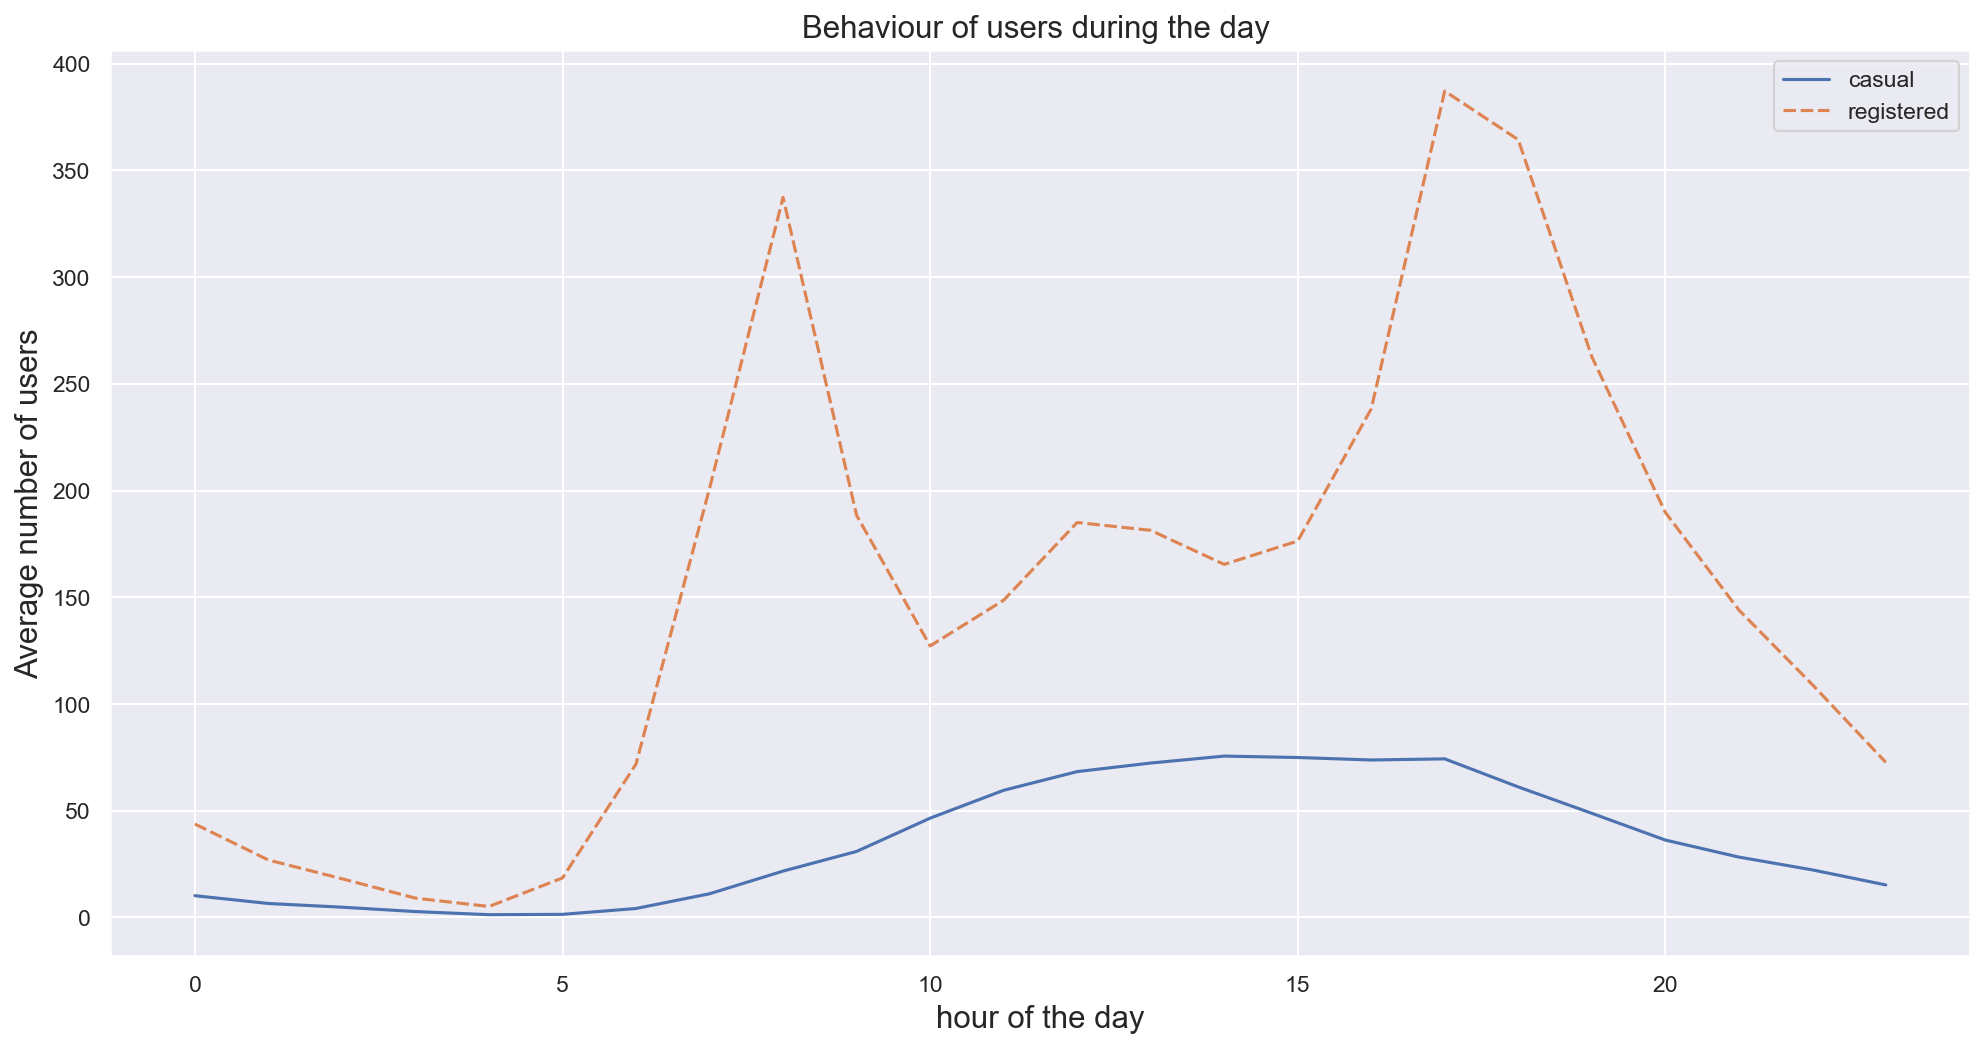

In [13]:
#answer to 5a goes here
average_hour = full.groupby(['hr']).agg({'casual':'mean','registered':'mean'})
sns.lineplot(data=average_hour)
plt.xlabel('hour of the day',fontsize=15)
plt.ylabel('Average number of users', fontsize=15)
plt.title('Behaviour of users during the day ',fontsize=15)


#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered users' distribution.

*** fancy answer goes here *** \
A hypothesis for the peaks in registered users might be that there are a lot of users at around 8 - 9 o'clock because most of the people start their daily work in that range.\
Also, the other peak is at 17 - 18 o'clock when people finish their working day.



---
## 6: Exploring Users and Weather

Now let's examine how the weather is affecting user' behavior. First let's look at how the proportion of casual user changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `full` DataFrame representing the proportion of casual users out of all users.

In [14]:
#answer to 6a goes here
full['prop_casual'] = full['casual']/full['cnt']
full['prop_casual']
full

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119,0.092437
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89,0.089888
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90,0.077778
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61,0.213115


#### Question 6b
In order to examine the relationship between proportion of casual users and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below (or adapt it if you have renamed any variables) and then comment on its explainability.

Text(0.5, 1.0, 'Relationship between the proportion of users and temperature')

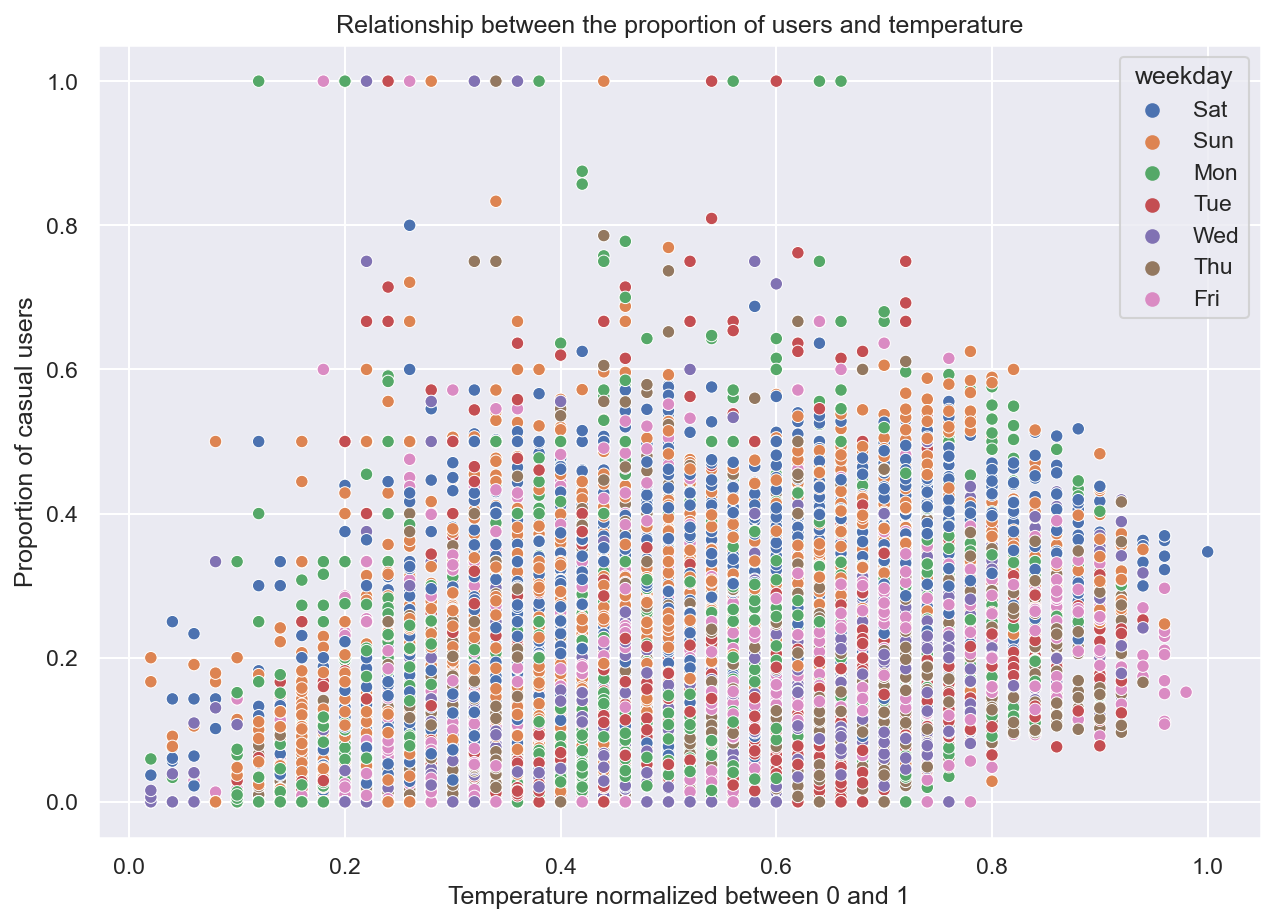

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=full, x="temp", y="prop_casual", hue="weekday")
plt.xlabel('Temperature normalized between 0 and 1')
plt.ylabel('Proportion of casual users')
plt.title('Relationship between the proportion of users and temperature')

How would you comment on this figure? Mention any problems you see. How would you think of approaching this problem?

*** fancy answer goes here ***



Overrepresentation and overfitting of the information. Firstly, the temperature is normalized and a lot of temperatures in Celsium are squeezed to a value between 0 and 1.\
There might be a million of values hide under one circle. This gives us a bad representation of the information in general. 

 

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The green curve shown is a smoothed version of the scatterplot.

C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


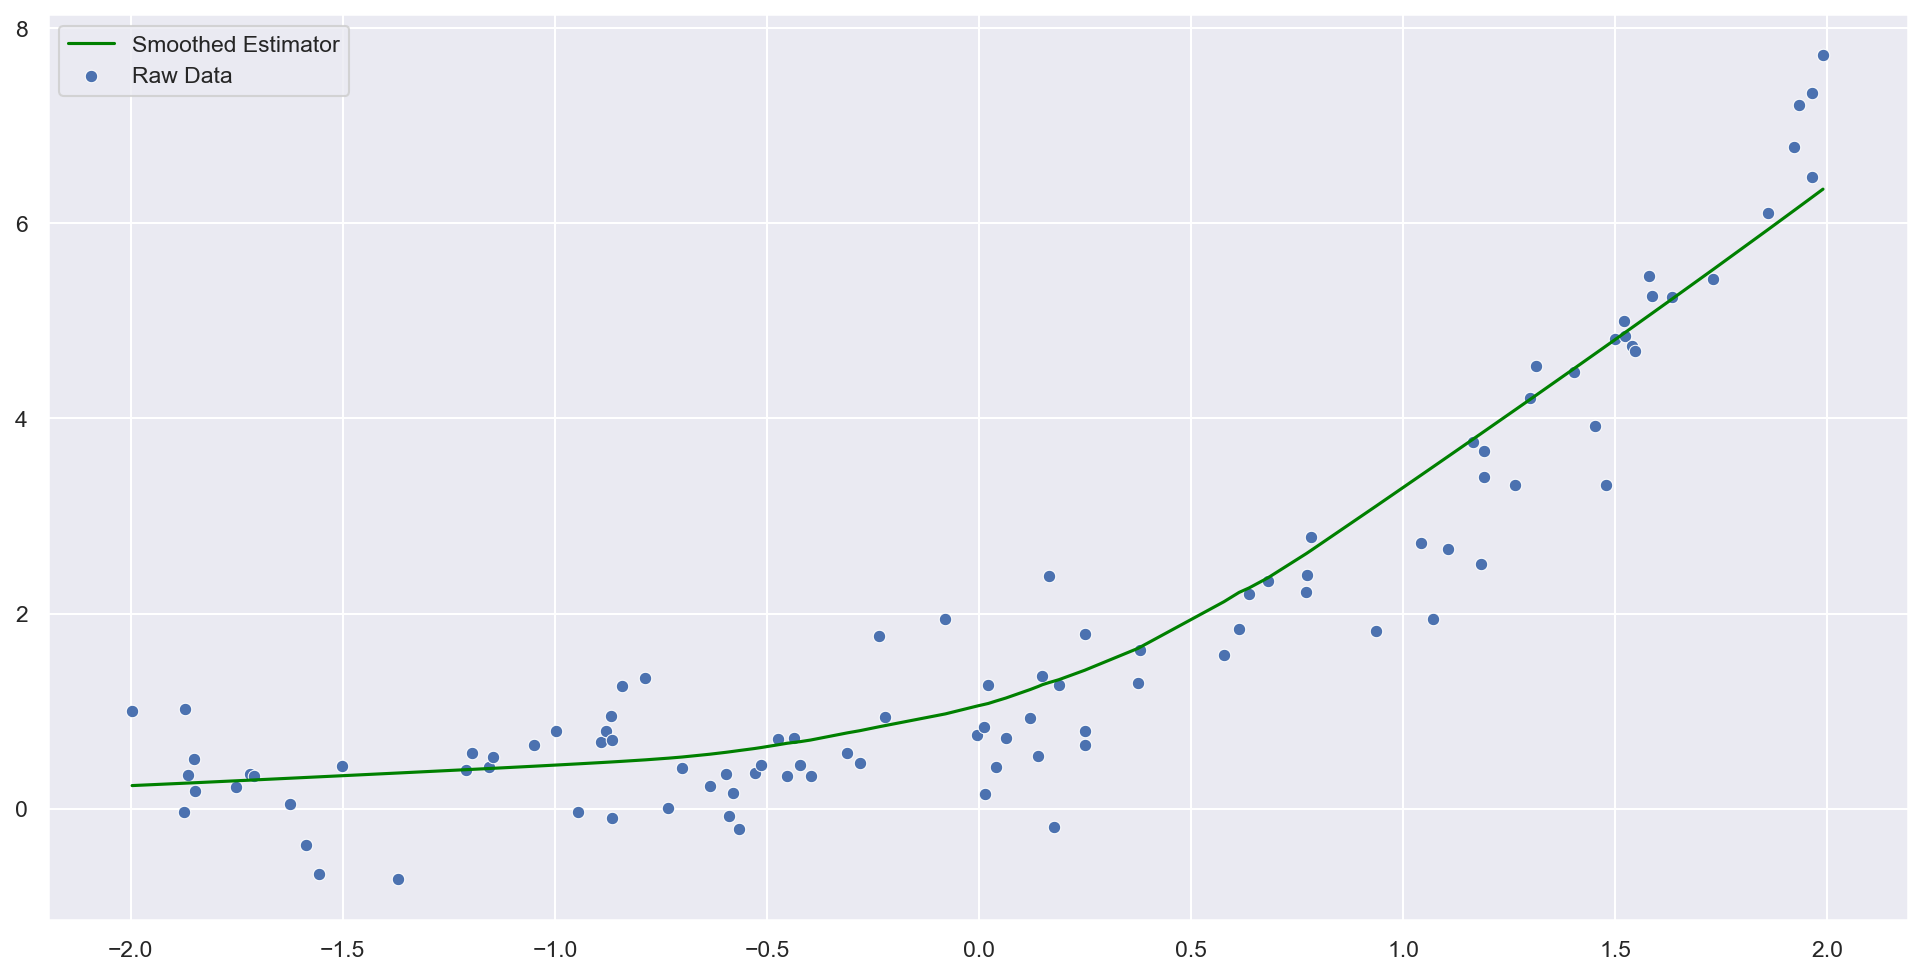

In [16]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='green')
plt.legend()

In our case with the users' data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual users.

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\as\anaconda3\envs\baseREC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0.5, 1.0, 'LOWESS curves for each day of the week')

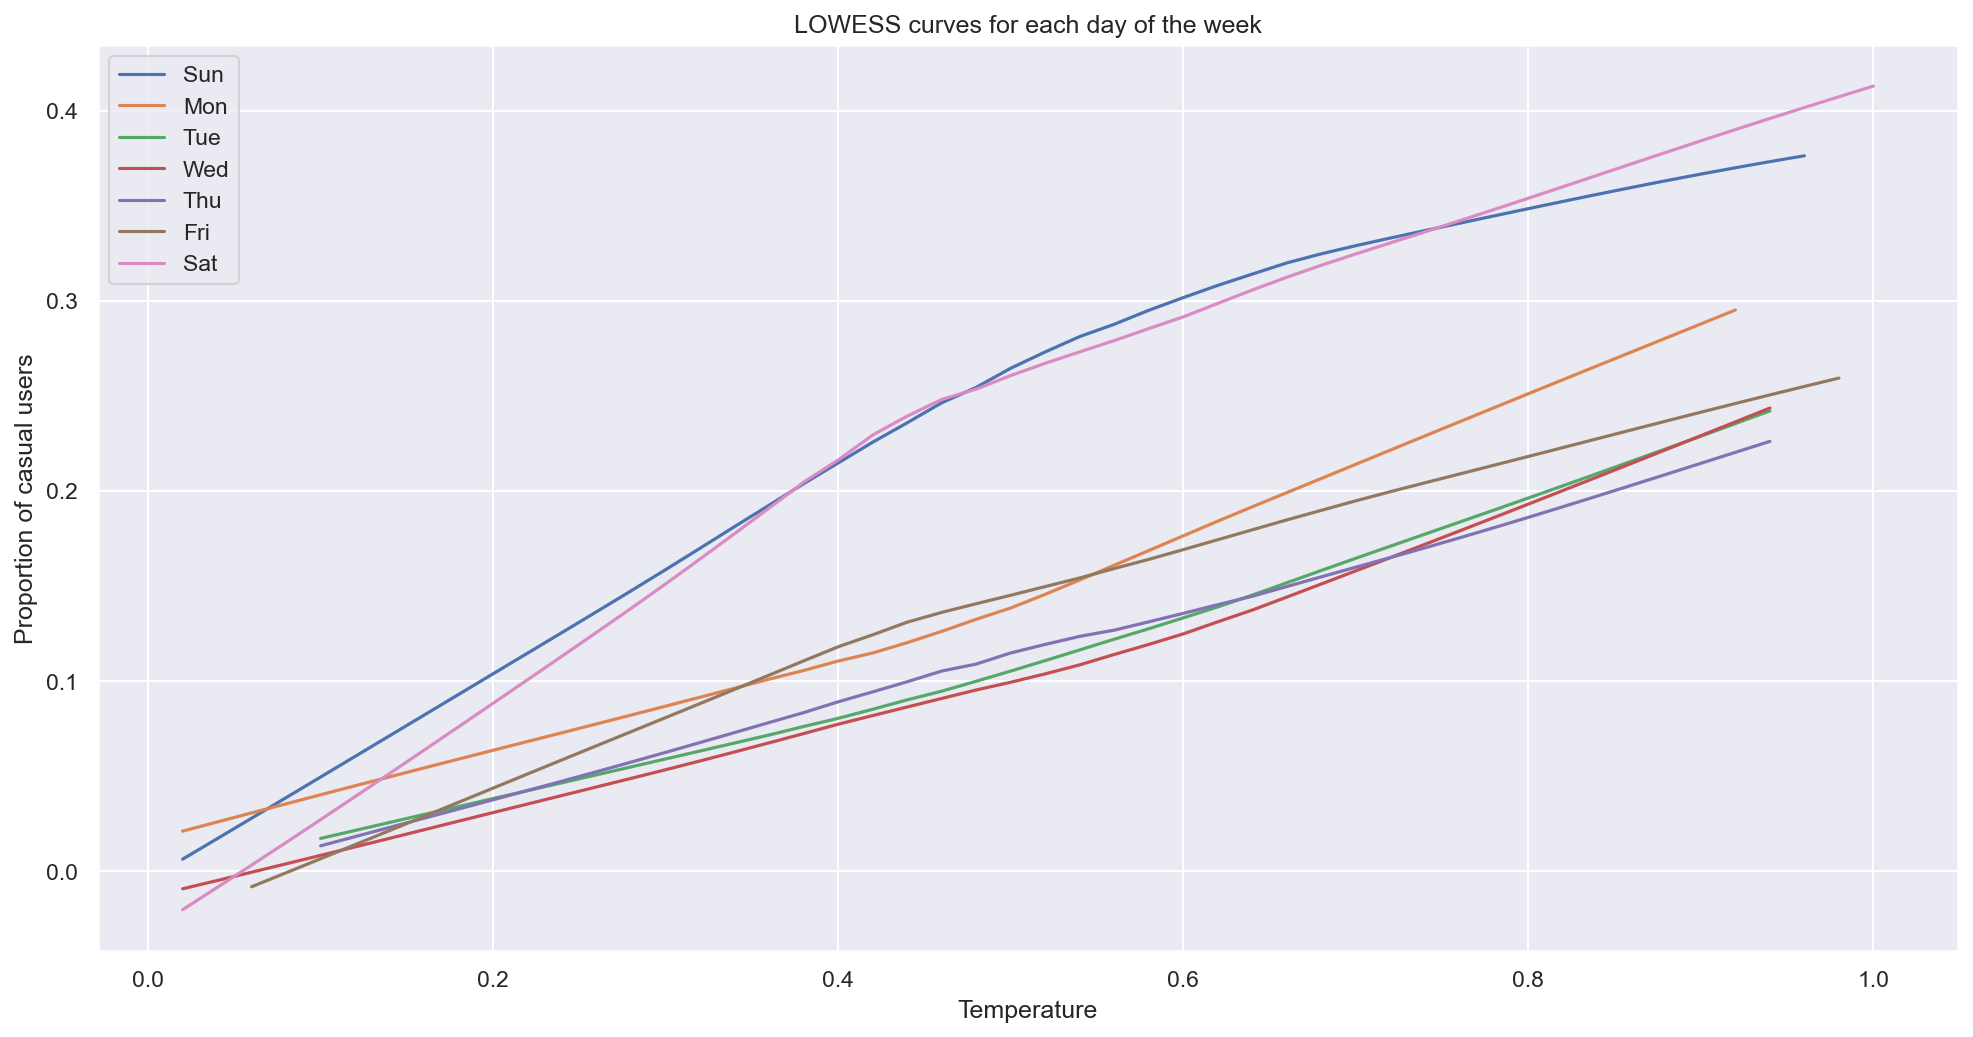

In [17]:
from statsmodels.nonparametric.smoothers_lowess import lowess
weekdays=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

for day in weekdays:
    weekday_df = full[full['weekday'] == day]
    # sns.lineplot(data = full, x =full['temp'], y =full['prop_casual'], label="Smoothed Estimator for"+ day , color='green')
    ysmooth = lowess(weekday_df['prop_casual'], weekday_df['temp'], return_sorted=False)
    sns.lineplot(weekday_df['temp'], ysmooth, label=day)

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Proportion of casual users')
plt.title('LOWESS curves for each day of the week')
#your code for 6b

### Question 6c

What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

*** fancy answer goes here ***\
I can observe that on Saturday and Sunday the temperatures are higher. \
The regression lines for Sat and Sun are following each other, they are pretty symmetrical.\
On the other hand, the proportion of users is low when the day is working day.\
Also, the lines for Tuesday, Wednesday and Thursday are really identical which means that the ratio betweeen proportion of casual users and the temperature will be similar as well.


### Question 6d

Based on the data you have explored (distribution of users, daily patterns, weather, additional data/information you have seen), do you think this scooter user info should be realistically scaled across other cities in Italy. Why or why not? Justify your answer as a data scientist.

*** fancy answer goes here ***\
I do not think that these data can be applied to other cities in Italy.\
The population will make a difference because the more people we have the more casual and registered users we will have.\
What is more, the ratio between them can be different.\
The temperature vary as well. It depends whether the city is in nort Italy(colder weather) or in south Italy(warmer weather).\
I think that for different cities, we will need different data to be as accurate and precise as possible.\
This process will be also costly and time-consuming.

 
